In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [4]:
X.shape

(50, 2)

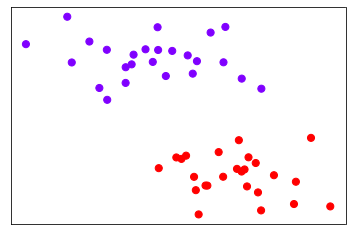

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

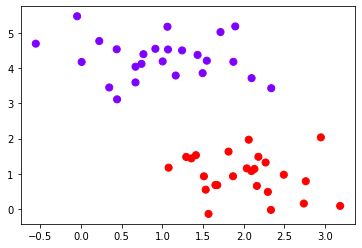

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()#获取当前的子图

In [7]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [8]:
xlim

(-0.7425578984849813, 3.3721920271976598)

In [9]:
ylim

(-0.41872382476349596, 5.754870487889891)

In [10]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [11]:
axisy,axisx = np.meshgrid(axisy,axisx)
#用形成的二维数组作为contour函数中的x和y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape*x.shape多个坐标点的横纵坐标

In [12]:
axisx.shape

(30, 30)

In [13]:
axisy.shape

(30, 30)

In [14]:
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

In [15]:
xy.shape

(900, 2)

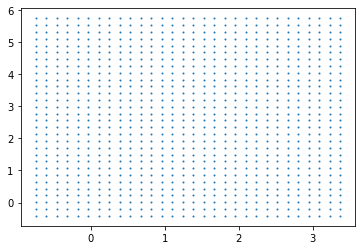

In [16]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [17]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本对应的到决策边界的距离
#然后将这个距离转换为axisx的结构,这是因为画图函数contour要求Z的结构必须与X和Y保持一致

C:\Users\boredcui\AppData\Local\Temp\ipykernel_17640\2286377565.py:4: UserWarning: The following kwargs were not used by contour: 'levers'
  ax.contour(axisx,axisy,Z


(-0.41872382476349596, 5.754870487889891)

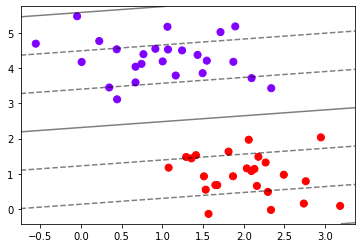

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()#获取当前的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-1,0,1]#画三条等高线，分别是Z为-1，0，1
            ,alpha=0.5
            ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)